`Note :` Group 25, global longrun LSTM Development
### This is the try out of the LSTM model only includes `one` geological location's time dependency variables as predictors. 

Date: Oct 4, 2022

In [4]:
from netCDF4 import Dataset
import numpy as np
import numpy.ma as ma
import pandas as pd
from numpy import hstack
import matplotlib.pyplot as plt
import gc

In [5]:
airTemp = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/tas.nc'
netLongRadiantionFlux = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/rlns.nc'
shortwaveRadiation = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/rsds.nc'
precipitation = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/pr.nc'
output = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/jedi_output.nc'

landSeaMask = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/landsea.nc'
lantitude =  'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/latitude.nc'
longitude = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/longitude.nc'
elevation = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/elevation.nc'
moisture = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/paw.nc'
spatialMetaData = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/globe_surf.nc'

airTempDataset = Dataset(airTemp)
netLongRadiantionFluxDataSet = Dataset(netLongRadiantionFlux)
shortwaveRadiationDataset = Dataset(shortwaveRadiation)
precipitationDataSet = Dataset(precipitation)
outputDataset = Dataset(output)

landSeaMaskDataset = Dataset(landSeaMask)
lantitudeDataset = Dataset(lantitude)
longitudeDataset = Dataset(longitude)
elevationDataset = Dataset(elevation)
moistureDataset = Dataset(moisture)
spatialMetaDataset = Dataset(spatialMetaData)

airTempArray = airTempDataset['tas'][:].squeeze()
netLongRadiantionFluxArray = netLongRadiantionFluxDataSet['rlns'][:].squeeze()
shortwaveRadiationArray = shortwaveRadiationDataset['rsds'][:].squeeze()
precipitationArray = precipitationDataSet['pr'][:].squeeze()
NPPArray = outputDataset['NPP'][:].squeeze()
landSeaMaskArray = landSeaMaskDataset['var1'][:].squeeze()
lantitudeArray = lantitudeDataset['lat'][:].squeeze()
longitudeArray = longitudeDataset['lon'][:].squeeze()
elevationArray = elevationDataset['data'][:].squeeze()
moistureArray = moistureDataset['paw'][:].squeeze()
spatialMetaDataArray = spatialMetaDataset['lev']

In [2]:
def normalize(x):
    for i in range(len(x)):
        x[i] = (x[i]-np.min(x))/(np.max(x)-np.min(x))
    return x


In [6]:
mask = NPPArray==0
maskednpp = ma.array(NPPArray,mask = mask)
maskednpp

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        ...,

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --,

In [7]:
NPPArray

masked_array(
  data=[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0.,

In [8]:
airTempArray_flatten= airTempArray.filled().reshape(-1)
netLongRadiantionFluxArray_flatten= netLongRadiantionFluxArray.filled().reshape(-1)
shortwaveRadiationArray_flatten= shortwaveRadiationArray.filled().reshape(-1)
precipitationArray_flatten= precipitationArray.filled().reshape(-1)
NPPArray_flatten= NPPArray.filled().reshape(-1)

In [9]:
# airTempArray_flatten= airTempArray.reshape(3516*145*192)
# netLongRadiantionFluxArray_flatten= netLongRadiantionFluxArray.reshape(3516*145*192)
# shortwaveRadiationArray_flatten= shortwaveRadiationArray.reshape(3516*145*192)
# precipitationArray_flatten= precipitationArray.reshape(3516*145*192)
# NPPArray_flatten= NPPArray.reshape(3516*145*192)
# geo_data = np.array(list(zip(airTempArray_flatten,netLongRadiantionFluxArray_flatten,shortwaveRadiationArray_flatten,precipitationArray_flatten,NPPArray_flatten))).reshape(3516,145*192*5)
# geo_data

In [10]:
#把NPP展开flatten成3516*27840的ndarray(一共145*192 = 27840个grid point）
# 去掉所有timestamp=0的column (这一步之后剩下8093个)
# 观察到有些NPP很多timestamp=0，所以如果包含0过多（非0的没超过3400个）就去掉，这一步之后剩下5845个point
reshape_NPP = NPPArray.reshape(3516,-1)
col_index_0 = []
for i in range(reshape_NPP.shape[1]):
    if np.all(reshape_NPP[:,i] == 0) == True:
        col_index_0.append(i)
        continue
    if np.count_nonzero(reshape_NPP[:,i])<3400:
        col_index_0.append(i)   



print("Total {} grid point needs to be removed, remaining {} locations".format(len(col_index_0),27840-len(col_index_0)))

Total 19747 grid point needs to be removed, remaining 8093 locations


In [8]:
clear_npp = np.delete(reshape_NPP,col_index_0,axis=1)
clear_npp[:,1]


masked_array(data=[0., 0., 0., ..., 0., 0., 0.],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

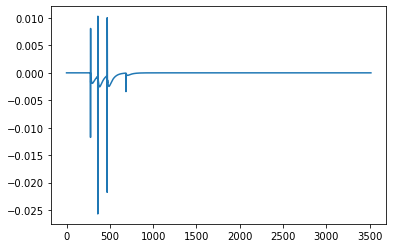

In [17]:
plt.plot(clear_npp[:,1])

In [9]:
#把对应其他4个时序变量，也去掉npp为0的column，和NPP不达标的column
reshape_airTemp = airTempArray.reshape(3516,-1)
reshape_precipitation = precipitationArray.reshape(3516,-1)
reshape_netLongRadiantionFlux = netLongRadiantionFluxArray.reshape(3516,-1)
reshape_shortwaveRadiation = shortwaveRadiationArray.reshape(3516,-1)

clear_npp = np.delete(reshape_NPP,col_index_0,axis=1)
clear_airTemp = np.delete(reshape_airTemp,col_index_0,axis=1)
clear_precip = np.delete(reshape_precipitation,col_index_0,axis=1)
clear_rlns = np.delete(reshape_netLongRadiantionFlux,col_index_0,axis=1)
clear_rsds = np.delete(reshape_shortwaveRadiation,col_index_0,axis=1)

#下一步需要取年平均值
print(clear_npp.shape)

(3516, 8093)


In [19]:
# 取完年平均值之后，应该都是（293*5845）的shape
# mean_airTemp = clear_airTemp.reshape((-1, clear_npp.shape[1])).mean( axis=1)
# mean_Precip = clear_precip.reshape((-1, clear_npp.shape[1])).mean( axis=1)
# mean_rlns = clear_rlns.reshape((-1, 12, clear_npp.shape[1])).mean( axis=1)
# mean_rsds = clear_rsds.reshape((-1, 12, clear_npp.shape[1])).mean( axis=1)
# mean_npp = clear_npp.reshape((-1, 12, clear_npp.shape[1])).mean( axis=1) # response

print(mean_npp.shape)

NameError: name 'mean_npp' is not defined

In [20]:
plt.plot(mean_npp[:,233].reshape(293,1)[:180])

NameError: name 'mean_npp' is not defined

In [21]:
180*12

2160

In [10]:
train_dataset = hstack((clear_airTemp[:,233].reshape(3516,1)[:2160],
                        clear_precip[:,233].reshape(3516,1)[:2160],
                        clear_rlns[:,233].reshape(3516,1)[:2160],
                        clear_rsds[:,233].reshape(3516,1)[:2160],
                        clear_npp[:,233].reshape(3516,1)[:2160]))

# test_dataset = hstack((mean_airTemp[:,10].reshape(293,1),
#                         mean_Precip[:,10].reshape(293,1),
#                         mean_rlns[:,10].reshape(293,1),
#                         mean_rsds[:,10].reshape(293,1),
#                         mean_npp[:,10].reshape(293,1)))
test_dataset = hstack((clear_airTemp[:,233].reshape(3516,1)[2160:],
                        clear_precip[:,233].reshape(3516,1)[2160:],
                        clear_rlns[:,233].reshape(3516,1)[2160:],
                        clear_rsds[:,233].reshape(3516,1)[2160:],
                        clear_npp[:,233].reshape(3516,1)[2160:]))

In [11]:
train_dataset = hstack((clear_airTemp[:,233].reshape(3516,1),
                        clear_precip[:,233].reshape(3516,1),
                        clear_rlns[:,233].reshape(3516,1),
                        clear_rsds[:,233].reshape(3516,1),
                        clear_npp[:,233].reshape(3516,1)))

### 准备predictors：一个grid point的版本，只有4个predictors,目的是让模型学习某一个grid point的生长动态，看能否应用到其他single grid point去预测 整个时序的NPP

In [24]:
# 还没分开x和y，train[:,:4] = x, train[:,-1] = y
train_dataset = hstack((mean_airTemp[:,233].reshape(293,1)[:180],
                        mean_Precip[:,2330].reshape(293,1)[:180],
                        mean_rlns[:,233].reshape(293,1)[:180],
                        mean_rsds[:,233].reshape(293,1)[:180],
                        mean_npp[:,233].reshape(293,1)[:180]))

# test_dataset = hstack((mean_airTemp[:,10].reshape(293,1),
#                         mean_Precip[:,10].reshape(293,1),
#                         mean_rlns[:,10].reshape(293,1),
#                         mean_rsds[:,10].reshape(293,1),
#                         mean_npp[:,10].reshape(293,1)))

test_dataset = hstack((mean_airTemp[:,233].reshape(293,1)[180:],
                        mean_Precip[:,233].reshape(293,1)[180:],
                        mean_rlns[:,233].reshape(293,1)[180:],
                        mean_rsds[:,233].reshape(293,1)[180:],
                        mean_npp[:,233].reshape(293,1)[180:]))

print("Training sample size: {} ".format(train_dataset.shape))
print("Testing sample size: {} ".format(test_dataset.shape))

NameError: name 'mean_airTemp' is not defined

In [25]:
train_dataset.shape

(3516, 5)

In [26]:
print(np.count_nonzero(test_dataset[:,-1]))

1335


In [12]:
from sktime.forecasting.model_selection import SlidingWindowSplitter
cv = SlidingWindowSplitter(window_length=12)

n_splits = cv.get_n_splits(train_dataset)
print(f"Number of Folds = {n_splits}")

Number of Folds = 3504


In [13]:
train_dataset.shape

(3516, 5)

In [14]:
train_dataset[:,-1]

masked_array(data=[0., 0., 0., ..., 0., 0., 0.],
             mask=False,
       fill_value=1e+20)

#### 根据timestamp 分开时序变量

In [23]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset|
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[i, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [24]:
# 总共291个time sample，每个是3*4（3年*4个时序变量）的ndarray，对应npp取第三年的数值
n_step = 12
train_x, train_y = split_sequences(train_dataset, n_step)
test_x, test_y = split_sequences(test_dataset, n_step)

print(train_x.shape, train_y.shape)

print(test_x.shape, test_y.shape)

(3505, 12, 4) (3505,)
(1345, 12, 4) (1345,)


In [35]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

## 准备LSTM的模型：最简单的一个

In [31]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM,CuDNNLSTM,Embedding
from keras.layers import Dense
from keras.layers import Dropout

n_step = 3
n_features = 4

# define model
model = Sequential()
model.add(LSTM(12, activation='relu', input_shape=(train_x.shape[1:])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'],)

# fit model
model.fit(train_x, train_y, epochs=10)

# test model，score=mse loss
scores = model.evaluate(test_x,test_y)
y_hat = model.predict(test_x,verbose=0)
print('Test mse loss = {} '.format(round(scores,5)))


Epoch 1/10
110/110 [==============================] - 6s 42ms/step - loss: 13639.2754 - accuracy: 0.0086
Epoch 2/10
110/110 [==============================] - 5s 43ms/step - loss: 4078.4338 - accuracy: 0.0074
Epoch 3/10
110/110 [==============================] - 5s 43ms/step - loss: 2275.6553 - accuracy: 0.0068
Epoch 4/10
110/110 [==============================] - 5s 43ms/step - loss: 1197.1699 - accuracy: 0.0057
Epoch 5/10
110/110 [==============================] - 5s 44ms/step - loss: 887.0107 - accuracy: 0.0049
Epoch 6/10
110/110 [==============================] - 5s 44ms/step - loss: 952.1599 - accuracy: 0.0049
Epoch 7/10
110/110 [==============================] - 5s 43ms/step - loss: 1214.7665 - accuracy: 0.0066
Epoch 8/10
110/110 [==============================] - 5s 43ms/step - loss: 711.1629 - accuracy: 0.0066
Epoch 9/10
110/110 [==============================] - 5s 44ms/step - loss: 546.4686 - accuracy: 0.0049
Epoch 10/10
43/43 [==============================] - 1s 10ms/step -

TypeError: type list doesn't define __round__ method

### 这个mse loss看起来还行，但是通过下面的画图发现预测的NPP并不准确，而且所选的test NPP甚至很多是负数？

In [51]:
y_hat.shape

(1345, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

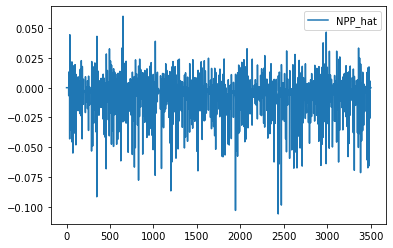

In [36]:


plt.plot(train_y,label = "NPP_hat")
# plt.plot(test_y,label = "original NPP")
plt.legend()
plt.show